### LGMVIP - **DATA ANALYTICS**

### Let's Grow More VIRTUAL INTERNSHIP PROGRAM 2021 November Batch

**Task 3**

**(INTERMEDIATE LEVEL TASK)** 

### Prediction using Decision Tree  Algorithm

Decision Tree Visualization

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df= pd.read_csv("iris.csv")
df.columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df1=df.copy()
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df1.shape

(150, 5)

In [9]:
df1.duplicated().sum()

3

In [11]:
df1 = df1.drop_duplicates()

In [12]:
df1.shape

(147, 5)

In [13]:
df1.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000


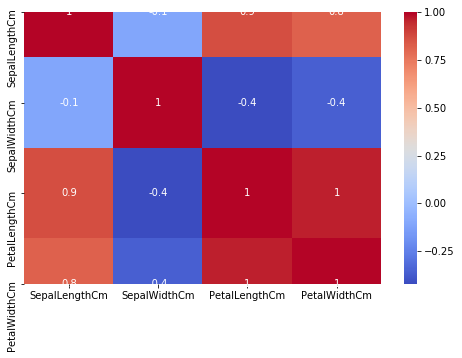

In [14]:
plt.figure(figsize=(8,5))
sns.heatmap(df1.corr(),annot=True,cbar=True,cmap='coolwarm',fmt='0.1g')
plt.show()

In [15]:
#skewness

print(df1.skew())

SepalLengthCm    0.292560
SepalWidthCm     0.324351
PetalLengthCm   -0.293763
PetalWidthCm    -0.113479
dtype: float64


In [16]:
df1['Species'].unique()
#df1['Species'].nunique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [17]:
df1['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

In [18]:
df1.groupby(['Species']).count()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,48,48,48,48
Iris-versicolor,50,50,50,50
Iris-virginica,49,49,49,49


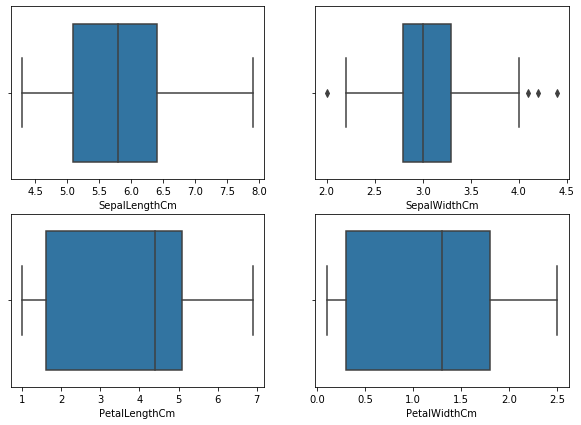

In [19]:
#outlier detection
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.boxplot(x=df1.SepalLengthCm)
plt.subplot(2,2,2)
sns.boxplot(x=df1.SepalWidthCm)
plt.subplot(2,2,3)
sns.boxplot(x=df1.PetalLengthCm)
plt.subplot(2,2,4)
sns.boxplot(x=df1.PetalWidthCm)
plt.show()


In [20]:
#outlier removal
a=df1.shape[0]
df1=df1[df1['SepalWidthCm']<4]           

In [21]:
print(df1.shape)

(143, 5)


In [22]:
#original
df.shape

(150, 5)

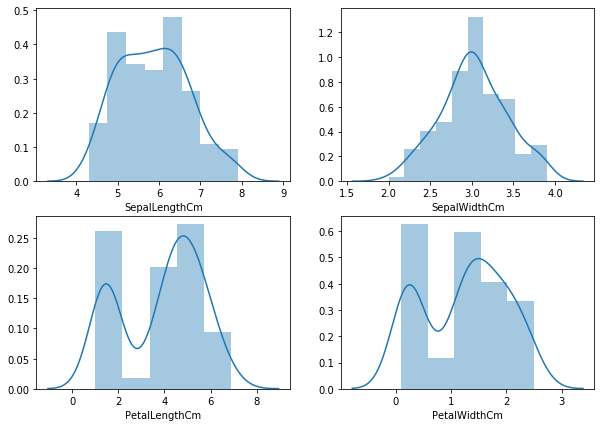

In [23]:
#univariate
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.distplot(df1.SepalLengthCm)
plt.subplot(2,2,2)
sns.distplot(df1.SepalWidthCm)
plt.subplot(2,2,3)
sns.distplot(df1.PetalLengthCm)
plt.subplot(2,2,4)
sns.distplot(df1.PetalWidthCm)
plt.show()

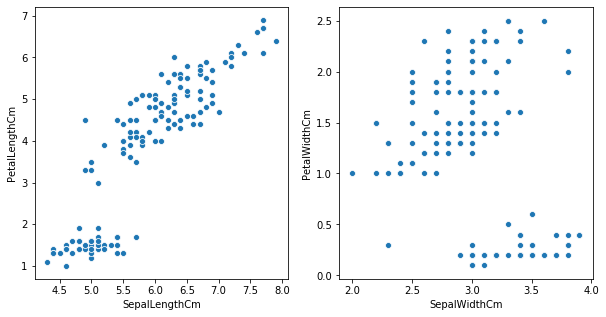

In [24]:
#multivariate
#sns.pairplot(df1)

#bivariate
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(df1.SepalLengthCm,df1.PetalLengthCm)
plt.subplot(1,2,2)
sns.scatterplot(df1.SepalWidthCm,df1.PetalWidthCm)
plt.show()

In [27]:
#label encoder
from sklearn.preprocessing import LabelEncoder

In [28]:
df2=df1['Species']
df2 = pd.DataFrame(df2)
df2['Spcies_encoded']=LabelEncoder().fit_transform(df2[['Species']])
print(df2.value_counts())
df2 = df2.drop(['Species'],axis=1)
df2.sample(5)

Species          Spcies_encoded
Iris-versicolor  1                 50
Iris-virginica   2                 49
Iris-setosa      0                 44
dtype: int64


,Spcies_encoded
130,2
26,0
113,2
138,2
51,1


In [29]:
#model
x = df1.drop(['Species'],axis=1)
y = df2

In [30]:
#from sklearn.metrics import *
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.7)
print('xtrain:',xtrain.shape)
print('xtest:',xtest.shape[0])
print('ytrain:',ytrain.shape)
print('ytest:',ytest.shape[0])

xtrain: (100, 4)
xtest: 43
ytrain: (100, 1)
ytest: 43


In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
model = DecisionTreeClassifier()
model = model.fit(xtrain,ytrain)

In [43]:
predict = model.predict(xtest)
accuracy_score(ytest,predict)

0.9534883720930233

In [44]:
print(classification_report(ytest,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.94      0.94      0.94        16
           2       0.90      0.90      0.90        10

    accuracy                           0.95        43
   macro avg       0.95      0.95      0.95        43
weighted avg       0.95      0.95      0.95        43



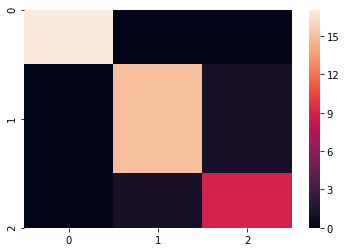

In [45]:
sns.heatmap(confusion_matrix(ytest,predict))

In [40]:
print('accuracy:',accuracy_score(ytest,predict)*100)

accuracy: 95.34883720930233


In [41]:
from sklearn import tree

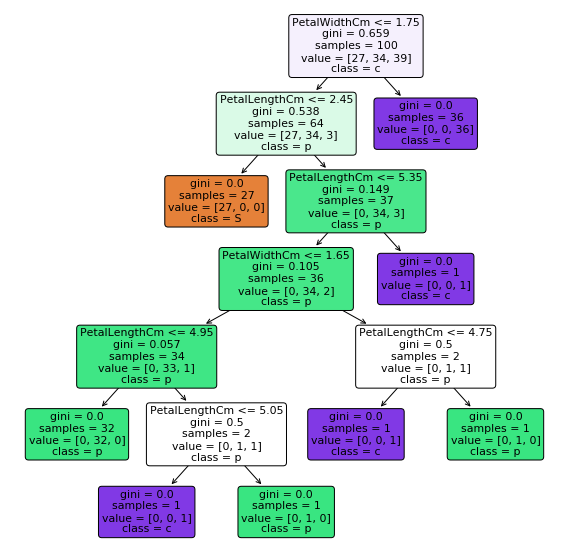

In [42]:
plt.figure(figsize=(10,10))
tree.plot_tree(model,feature_names=df1.columns[:-1],class_names=df2.columns[0],rounded=True,filled=True)
plt.show()

**Inference**

In [39]:
sepal_length = input("sepal_length:")
sepal_width = input("sepal_width:")
petal_length = input("petal_length:")
petal_width = input("petal_width:")

data = [[sepal_length,sepal_width,petal_length,petal_width]]

def infer(data):
    predicted = model.predict(data)[0]
    if predicted == 0:
        print("Iris-setosa")
    if predicted == 1:
        print("Iris-versicolor")
    if predicted == 2:
        print("Iris-virginica")
        
print("\npredicted Species:")
        
infer(data)

sepal_length:4.9
sepal_width:3.0
petal_length:1.4
petal_width:0.2

predicted Species:
Iris-setosa
